# Package Loading


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_1samp, f_oneway
from sklearn.preprocessing import LabelEncoder
!pip install sqlalchemy==1.4.46
!pip install pandasql
import pandasql as ps
import random
from sklearn.linear_model import LogisticRegression



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.1 MB/s eta 0:00:00
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.23
    Uninstalling SQLAlchemy-2.0.23:
      Successfully uninstalled SQLAlchemy-2.0.23
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython-sql 0.5.0 requires sqlalchemy>=2.0, but you have sqlalchemy 1.4.46 which is incompatible.
  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26772 sha256=7978af6f608e91ed77d96ad57b5e7a796518940a0958908c40c4e1c275afe56e
  Stored in directory: /root/.cache/pip/wheels/e9/bc/3a/8434bdcccf5779e72894a9b24fecbdcaf97940607eaf4bcdf9
Successfully built pandasql


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_auc_score, roc_curve, precision_score, recall_score,auc
from sklearn.preprocessing import StandardScaler,label_binarize
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint,uniform
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV,RandomizedSearchCV, RepeatedStratifiedKFold
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
import warnings
from itertools import cycle
from torchsummary import summary



In [ ]:
warnings.simplefilter("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/CIS545/Project545/'
train = pd.read_csv(file_path + 'train.csv')
test = pd.read_csv(file_path + 'test.csv')


Mounted at /content/drive


# EDA


In [ ]:
train.head(5)

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0


In [ ]:
train.describe()

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,Churn
count,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000
mean,60.083758,12.490695,750.741017,20.502179,92.264061,24.503513,3.002713,4.504186,12.018508,0.181232
std,34.285143,4.327615,523.073273,11.243753,50.505243,14.421174,1.155259,2.872548,7.193034,0.385211
min,1.000000,4.990062,4.991154,1.000065,5.000547,0.000000,1.000007,0.000000,0.000000,0.000000
25%,30.000000,8.738543,329.147027,10.763953,48.382395,12.000000,2.000853,2.000000,6.000000,0.000000
50%,60.000000,12.495555,649.878487,20.523116,92.249992,24.000000,3.002261,4.000000,12.000000,0.000000
75%,90.000000,16.238160,1089.317362,30.219396,135.908048,37.000000,4.002157,7.000000,18.000000,0.000000
max,119.000000,19.989957,2378.723844,39.999723,179.999275,49.000000,4.999989,9.000000,24.000000,1.000000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243787 entries, 0 to 243786
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   AccountAge                243787 non-null  int64  
 1   MonthlyCharges            243787 non-null  float64
 2   TotalCharges              243787 non-null  float64
 3   SubscriptionType          243787 non-null  object 
 4   PaymentMethod             243787 non-null  object 
 5   PaperlessBilling          243787 non-null  object 
 6   ContentType               243787 non-null  object 
 7   MultiDeviceAccess         243787 non-null  object 
 8   DeviceRegistered          243787 non-null  object 
 9   ViewingHoursPerWeek       243787 non-null  float64
 10  AverageViewingDuration    243787 non-null  float64
 11  ContentDownloadsPerMonth  243787 non-null  int64  
 12  GenrePreference           243787 non-null  object 
 13  UserRating                243787 non-null  f

In [ ]:
train.duplicated().sum()

0

In [ ]:
train.isna().sum()

AccountAge                  0
MonthlyCharges              0
TotalCharges                0
SubscriptionType            0
PaymentMethod               0
PaperlessBilling            0
ContentType                 0
MultiDeviceAccess           0
DeviceRegistered            0
ViewingHoursPerWeek         0
AverageViewingDuration      0
ContentDownloadsPerMonth    0
GenrePreference             0
UserRating                  0
SupportTicketsPerMonth      0
Gender                      0
WatchlistSize               0
ParentalControl             0
SubtitlesEnabled            0
CustomerID                  0
Churn                       0
dtype: int64

In [ ]:
'''
We selected the nuemrical columns except Churn which is out target
'''
numeric_columns = train.columns[(train.dtypes == 'int64') |(train.dtypes == 'float64')]
numeric_columns = numeric_columns[:-1]
numeric_columns

Index(['AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek',
       'AverageViewingDuration', 'ContentDownloadsPerMonth', 'UserRating',
       'SupportTicketsPerMonth', 'WatchlistSize'],
      dtype='object')

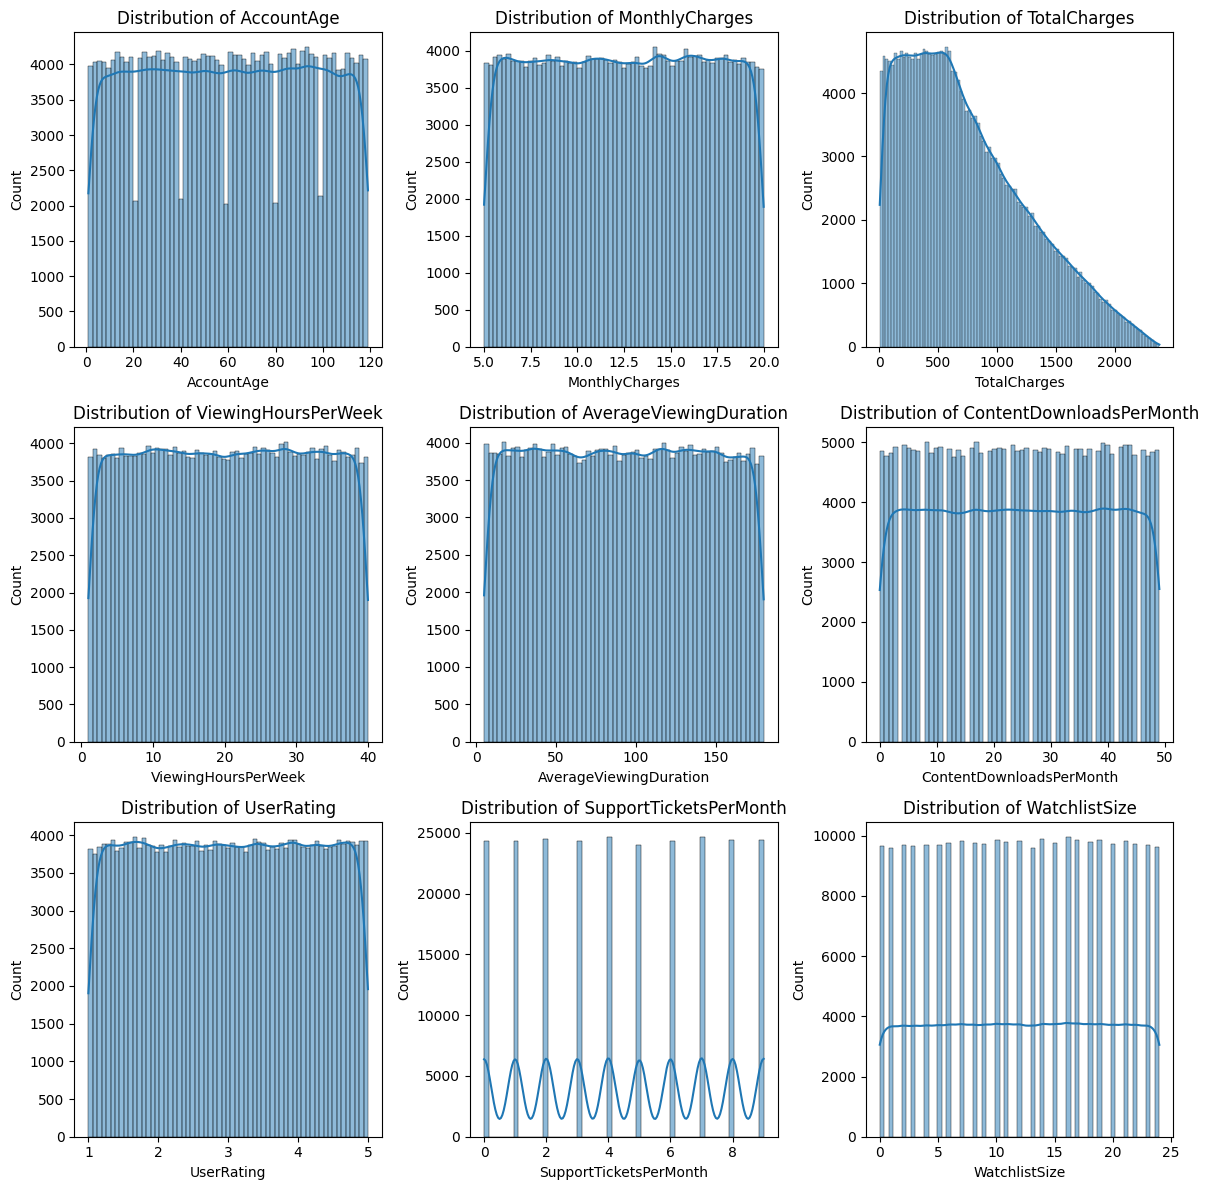

In [ ]:
'''
Generated histgrams to look at distributions of numerical columns
'''


fig, axes = plt.subplots(3, 3, figsize=(12, 12))
for i, col in enumerate(numeric_columns):
    sns.histplot(data=train, x=col, kde=True,ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title('Distribution of ' + col)
plt.tight_layout()
plt.show()


## Numerical Columns Analyzed
- `AccountAge`
- `MonthlyCharges`
- `TotalCharges`
- `ViewingHoursPerWeek`
- `ContentDownloadsPerMonth`
- `UserRating`
- `SupportTicketsPerMonth`
- `WatchlistSize`
- `CustomerID`

### 1. **AccountAge**
   - Distribution: Uniform; Represents an evenly distributed customer base in terms of account age.

### 2. **MonthlyCharges**
   - Distribution: Slightly right-skewed; Most customers have lower monthly charges, but a few incur significantly higher charges.

### 3. **TotalCharges**
   - Distribution: Right-skewed; Many customers accumulate lower total charges over time, but some have high total expenses.

### 4. **ViewingHoursPerWeek**
   - Distribution: Normal; Indicates a common range of viewing hours among most customers.

### 5. **ContentDownloadsPerMonth**
   - Distribution: Right-skewed; Majority download content less frequently, with a smaller segment having higher download frequencies.

### 6. **UserRating**
   - Distribution: Normal; Shows a general trend in user satisfaction ratings.

### 7. **SupportTicketsPerMonth**
   - Distribution: Right-skewed; Most customers raise few support tickets, while a few raise many.

### 8. **WatchlistSize**
   - Distribution: Right-skewed; A large number of customers have smaller watchlists, with some having significantly larger ones.


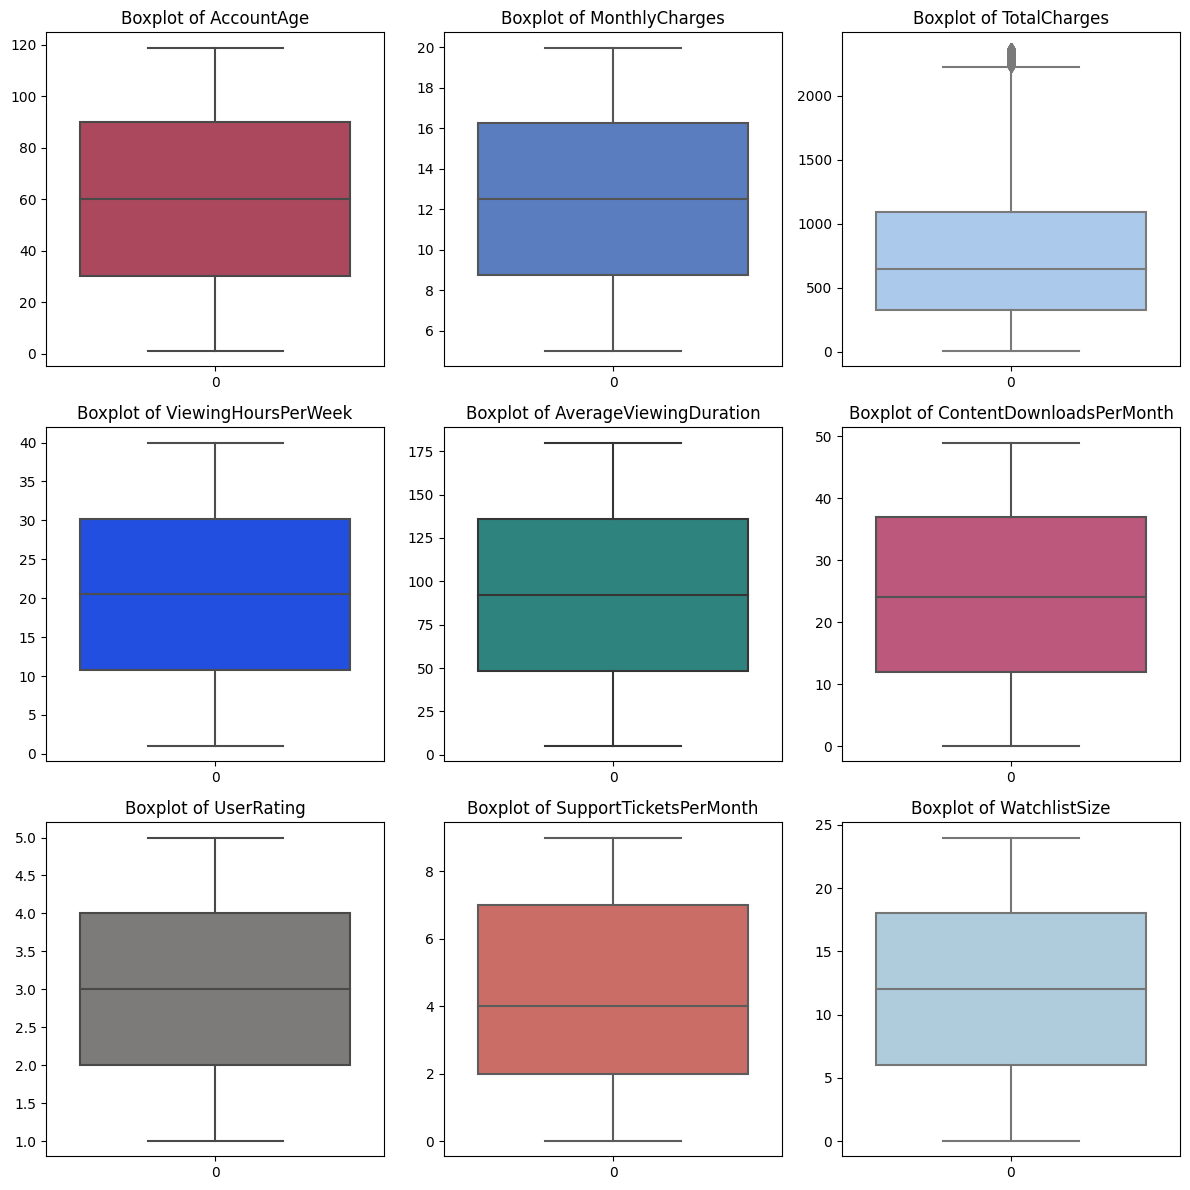

In [ ]:
'''
Generate boxplot for numerical columns to detect issues like outlier.
Clearly we do find some outliers in Total Charge
'''

fig, axes = plt.subplots(3, 3, figsize=(12, 12))
color_list = ['inferno','muted','pastel','bright','viridis','plasma','cividis','hls','Paired','Paired_r']
for i, col in enumerate(numeric_columns):
    sns.boxplot(data=train[col],ax=axes[i // 3, i % 3],palette=color_list[i])
    axes[i // 3, i % 3].set_title('Boxplot of ' + col)
plt.tight_layout()
plt.show()



### Analysis
- **TotalCharges**: The boxplot reveals outliers in the `TotalCharges` column. They are points beyond the whiskers of the boxplot, which are 1.5 times the interquartile range (IQR) from the quartiles.
- **Analysis**: Could indicate customers with unusually high usage or long-term customers with high accumulated charges.


In [ ]:
'''
Filter all categeorical columns
'''

categorical_columns = train.columns[train.dtypes=='object']
categorical_columns = categorical_columns[:-1]
categorical_columns

Index(['SubscriptionType', 'PaymentMethod', 'PaperlessBilling', 'ContentType',
       'MultiDeviceAccess', 'DeviceRegistered', 'GenrePreference', 'Gender',
       'ParentalControl', 'SubtitlesEnabled'],
      dtype='object')

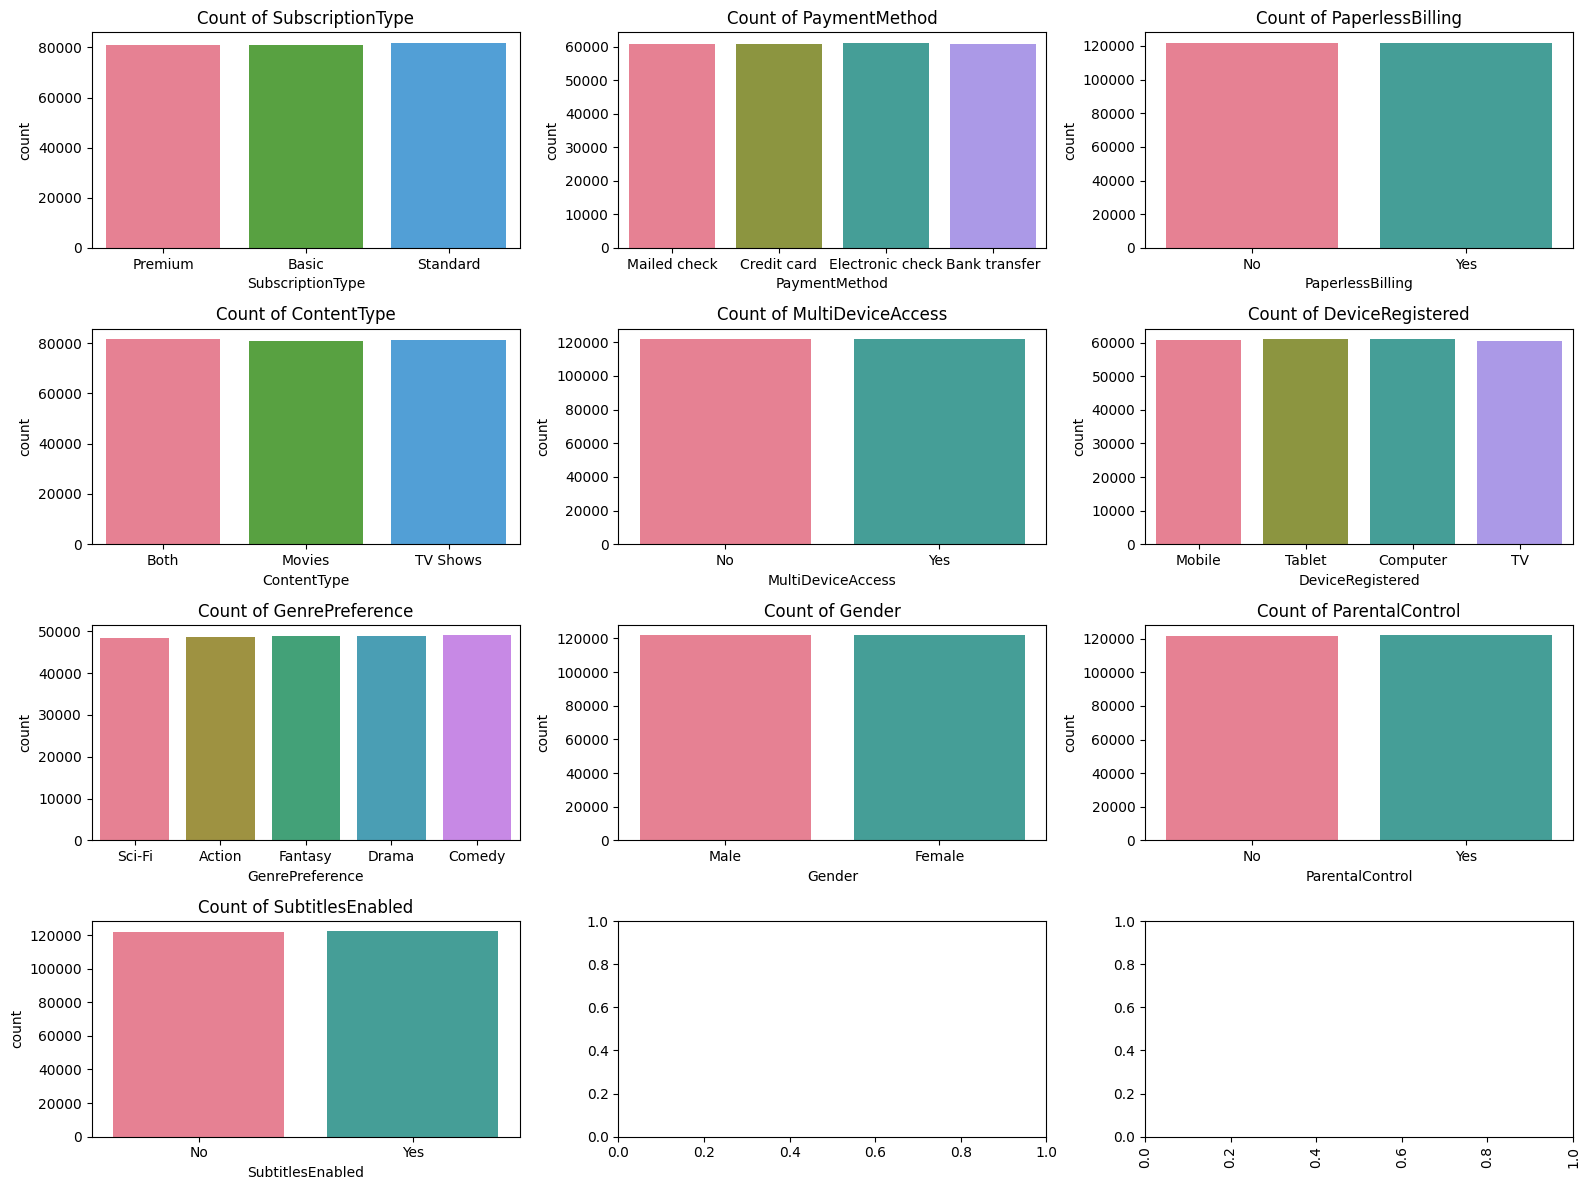

In [ ]:
'''
Use seaborn to produce counterplot of all categorical variables to indentify potential imbalanced data or features.
The results shows that all categorical data are well distributed.
'''


fig, axes = plt.subplots(4, 3, figsize=(16, 12))
for i, col in enumerate(categorical_columns):
    sns.countplot(data=train, x=col,ax=axes[i//3,i%3],palette='husl')
    axes[i // 3, i % 3].set_title('Count of ' + col)
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



### Analysis
- **Distribution**: Most categorical variables appear to be well distributed.
- **Diverse Categories**: There is a diversity in the categories present within each variable.
- **Visualization Clarity**: The countplots provide a clear visualization of category frequencies.



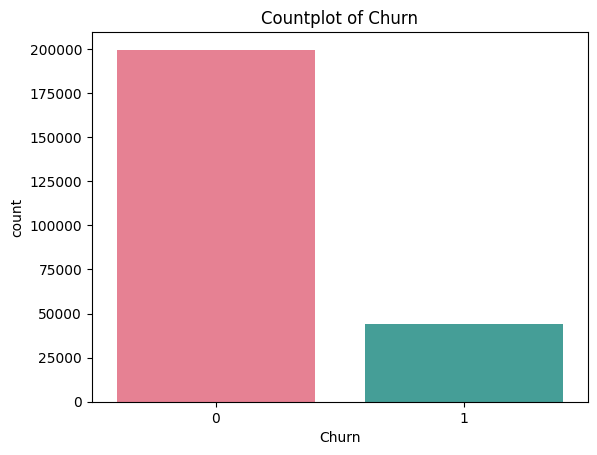

In [ ]:
'''
The labels are badly imbalanced we need to consider resample methods like downsample or upsample as well as addressing class weights in our model
'''
sns.countplot(data=train, x='Churn',palette='husl')
plt.title('Countplot of Churn')
plt.show()


### Analysis
'Churn' column reveals a significant imbalance between the two classes.

We may adjust the class weights during model training to give more importance to the minority class.


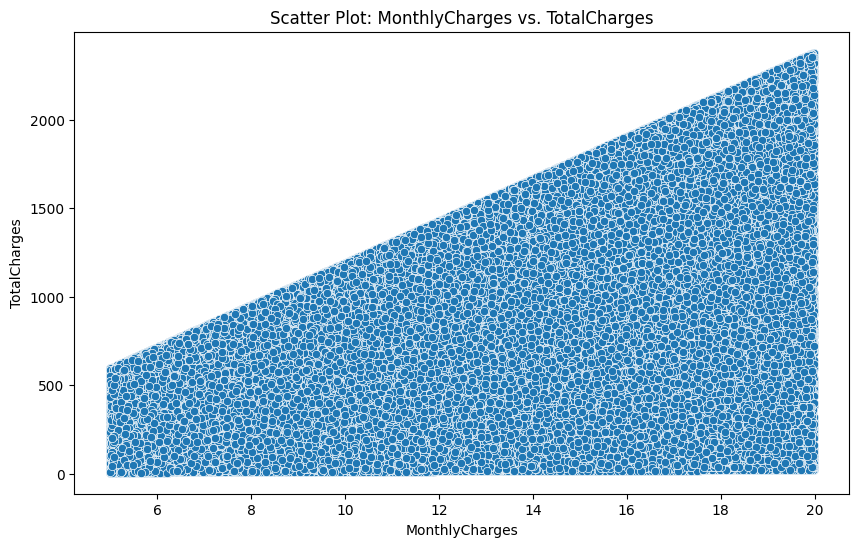

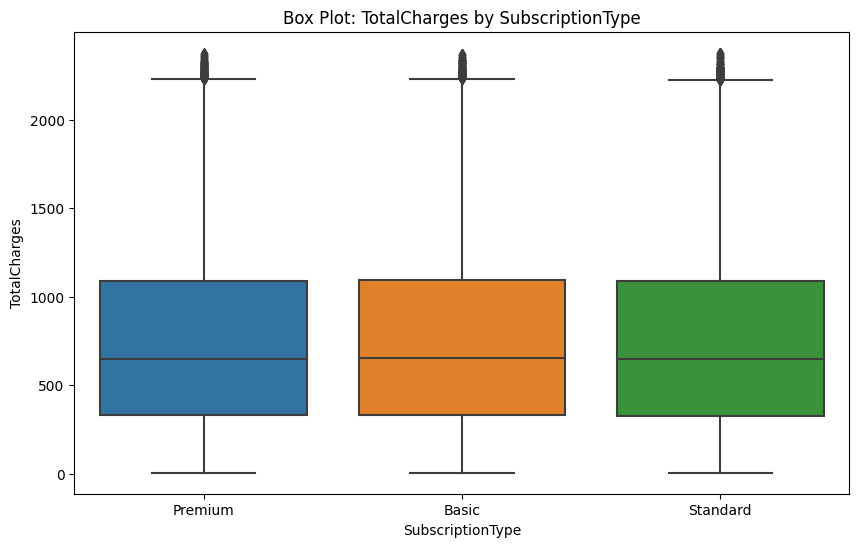

In [ ]:
# 1. Scatter Plot: MonthlyCharges vs. TotalCharges
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', data=train)
plt.title('Scatter Plot: MonthlyCharges vs. TotalCharges')
plt.show()

# 2. Box Plot: TotalCharges across different SubscriptionType
plt.figure(figsize=(10, 6))
sns.boxplot(x='SubscriptionType', y='TotalCharges', data=train)
plt.title('Box Plot: TotalCharges by SubscriptionType')
plt.show()


### Analysis

**Scatter Plot** - MonthlyCharges vs. TotalCharges:

- Observation: There appears to be a positive correlation between MonthlyCharges and TotalCharges. This suggests that as monthly charges increase, total charges also tend to increase. This relationship is expected as customers with higher monthly charges would accumulate more total charges over time, especially if they have been subscribers for a longer period.

**Box Plot** - TotalCharges by SubscriptionType:

- Observation: The distribution of TotalCharges varies across different SubscriptionType categories. Some subscription types show a wider range and higher median of total charges, indicating variability in how much different subscribers are charged over time.This could suggest that certain subscription types, potentially premium or more comprehensive packages, are associated with higher overall expenditures. It also indicates the varying spending habits or service usage patterns among different subscription categories.


# Feature Engineer

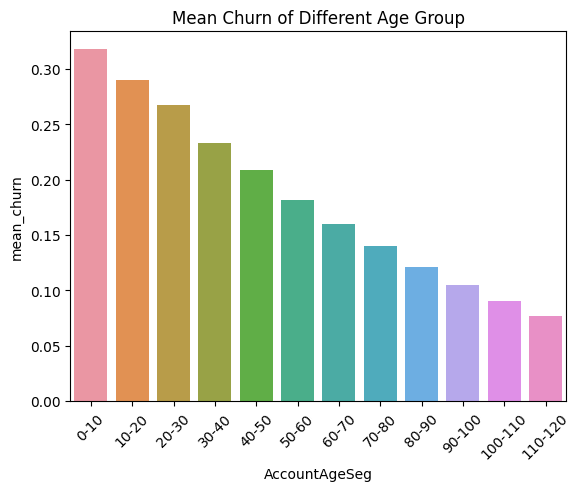

In [ ]:
'''
Create a new feature which segement ages in to periods of range 10 i.e user with age 16 months will be assigned to 10-20, user with age 29 months will be assigned to 20-30
Also create the barplot to see the mean churn rate of different age group
We found that a younger age group tends to have a higher churn rate.
'''
age_ranges = [i*10 for i in range(13)]
age_labels = [str(age_ranges[i])+'-'+str(age_ranges[i+1]) for i in range(12)]
train['AccountAgeSeg'] = pd.cut(train['AccountAge'], bins=age_ranges, labels=age_labels, right=False)
mean_churn_age = train.groupby(['AccountAgeSeg']).agg(mean_churn = ('Churn','mean'))
sns.barplot(x=mean_churn_age.index ,y=mean_churn_age.mean_churn)
plt.title('Mean Churn of Different Age Group')
plt.xticks(rotation=45)
plt.show()

### Analysis
- Higher Churn in Younger Age Groups: younger age groups show a higher churn rate, this might suggest that newer or less established customers are more likely to discontinue services.

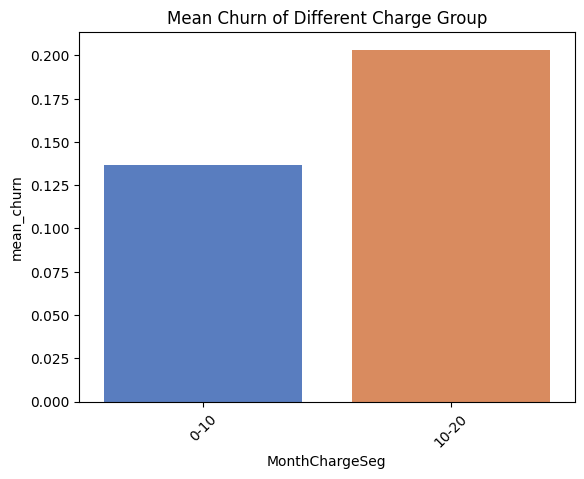

In [ ]:
'''
Create a new feature which segement monthly charge in to periods of range 10 i.e user with monthly chare 16  will be assigned to 10-20
Also create the barplot to see the mean churn rate of different monthly charge group
We found that user with higher monthly charge tends to have a higher churn rate
It is strange since we think people will not leave if they spend a lot on the subscription-based servic due to the issue of sunk cost
But somehow, it is explainable. If user spend a lot of the service, when they find another platform the provides the same service but with a lower price, they will definately leave
'''
charge_ranges = [i*10 for i in range(3)]  # Define your own age ranges
charge_labels = [str(age_ranges[i])+'-'+str(age_ranges[i+1]) for i in range(2)]
train['MonthChargeSeg'] = pd.cut(train['MonthlyCharges'], bins=charge_ranges, labels=charge_labels, right=False)
mean_churn_charge = train.groupby(['MonthChargeSeg']).agg(mean_churn = ('Churn','mean'))
sns.barplot(x=mean_churn_charge.index ,y=mean_churn_charge.mean_churn,palette='muted')
plt.title('Mean Churn of Different Charge Group')
plt.xticks(rotation=45)
plt.show()


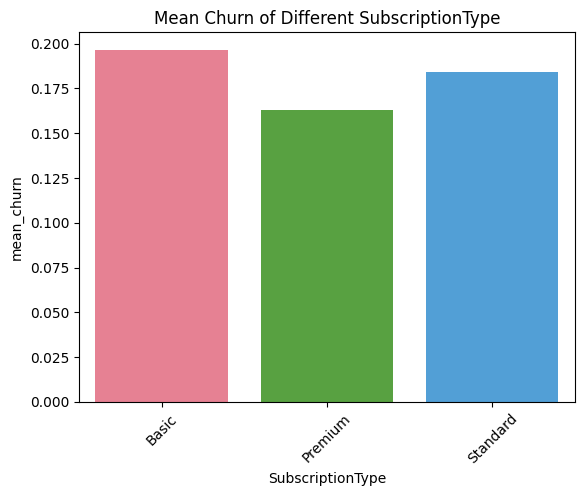

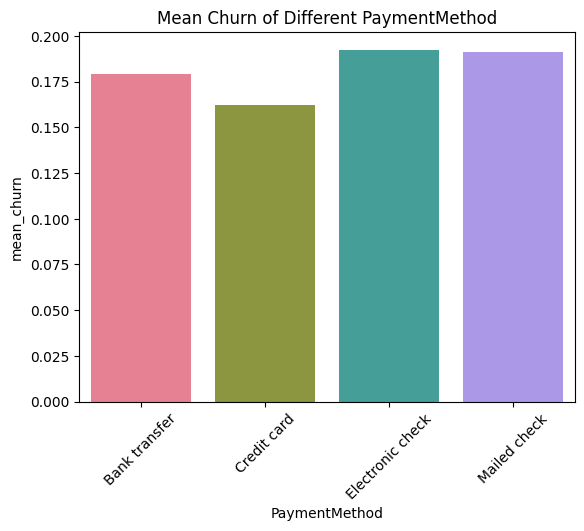

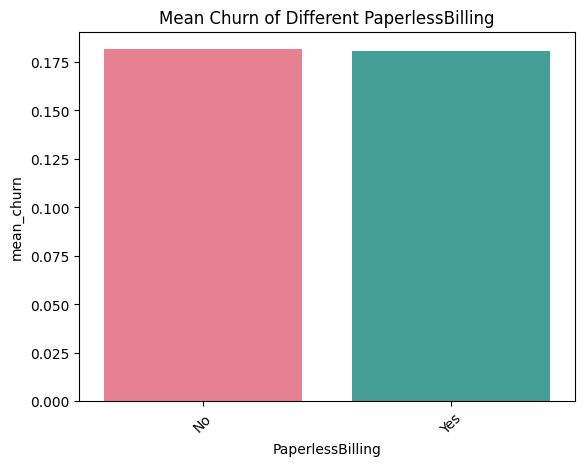

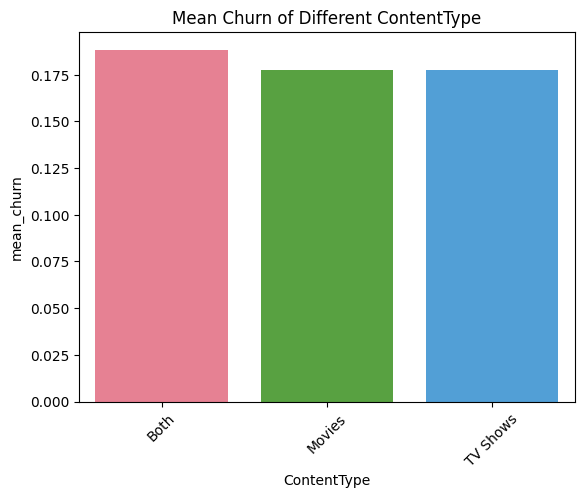

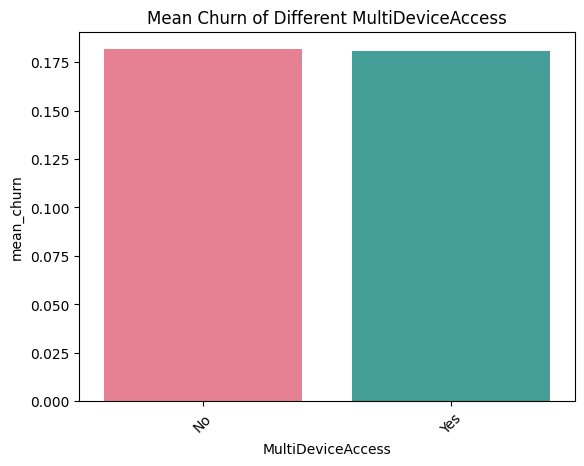

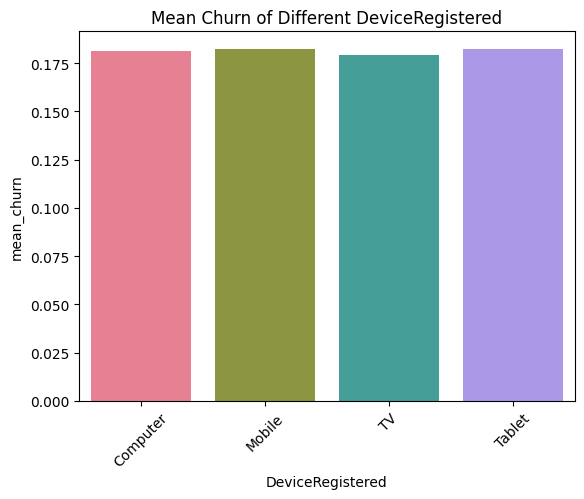

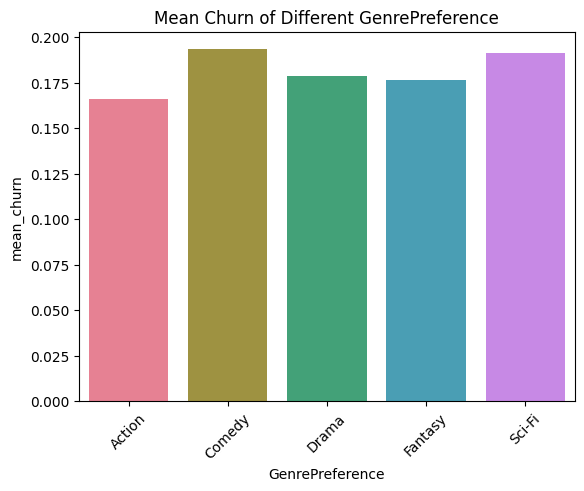

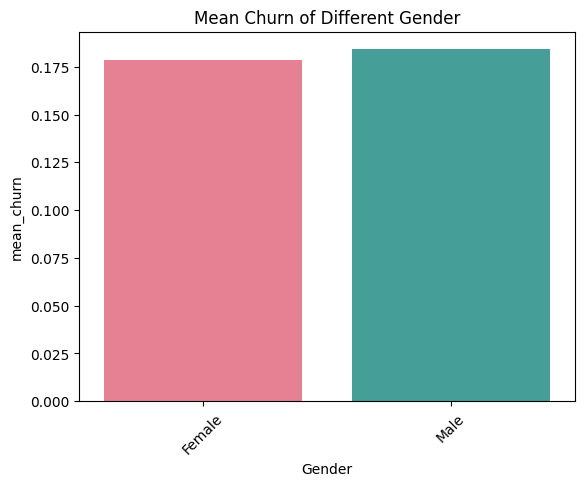

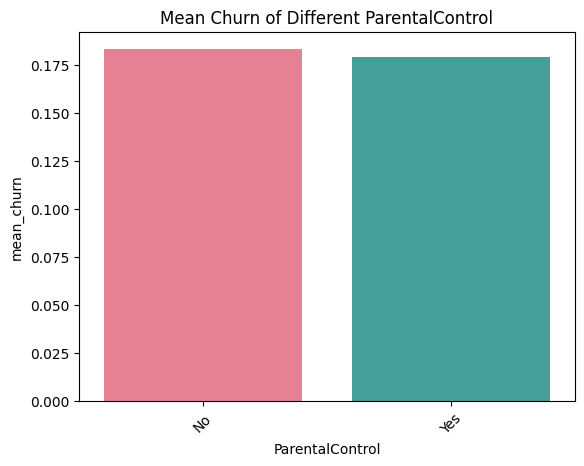

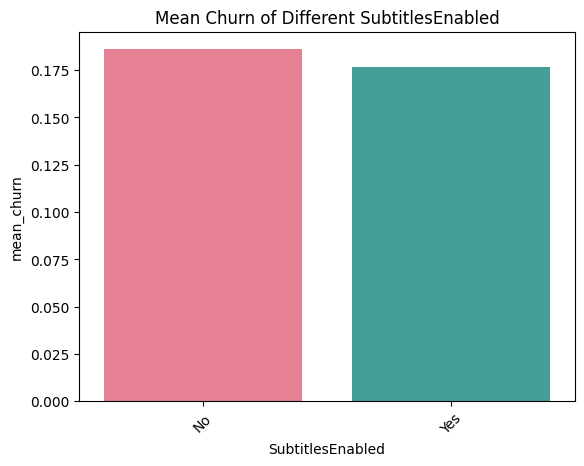

In [ ]:
'''
Use Seaborn to generate the mean churn difference between different labels in categorical columns
'''
for col in categorical_columns:
  mean_churn = train.groupby([col]).agg(mean_churn = ('Churn','mean'))
  sns.barplot(x=mean_churn.index ,y=mean_churn.mean_churn,palette='husl')
  plt.title(f'Mean Churn of Different {col}')
  plt.xticks(rotation=45)
  plt.show()


In [ ]:
'''
Performed a Anova test to further investigate the mean churn difference with categorical features
PaperlessBilling, MultiDeviceAccess and DeviceRegistered do not show a statistical significant mean churn difference.
We can use l1 regularization in models to automatically help us select features.
However, we decide to delete them instead,
'''
#so may be we can drop PaperlessBilling, MultiDeviceAccess and DeviceRegistered since we did not see a
#mean churn rate difference or consider use L1 regularization to help feature selection
potential_list = ['SubscriptionType','PaymentMethod','ContentType','GenrePreference','Gender','SubtitlesEnabled']
for col in categorical_columns:
  dff = []
  uniques = set(train[col])
  for i in uniques:
      dff.append(train['Churn'][train[col]==i])
  if len(uniques)==2:
       _, p_value = f_oneway(dff[0], dff[1])
  if len(uniques)==3:
       _, p_value = f_oneway(dff[0], dff[1],dff[2])
  if len(uniques)==4:
       _, p_value = f_oneway(dff[0], dff[1],dff[2],dff[3])
  if len(uniques)==5:
       _, p_value = f_oneway(dff[0], dff[1],dff[2],dff[3],dff[4])

  if p_value < 0.05:
    print(f'At least one Churn mean is significantly different in {col}')
  else:
    print(f'We did not see a significant Churn mean difference in {col}')


At least one Churn mean is significantly different in SubscriptionType
At least one Churn mean is significantly different in PaymentMethod
We did not see a significant Churn mean difference in PaperlessBilling
At least one Churn mean is significantly different in ContentType
We did not see a significant Churn mean difference in MultiDeviceAccess
We did not see a significant Churn mean difference in DeviceRegistered
At least one Churn mean is significantly different in GenrePreference
At least one Churn mean is significantly different in Gender
At least one Churn mean is significantly different in ParentalControl
At least one Churn mean is significantly different in SubtitlesEnabled


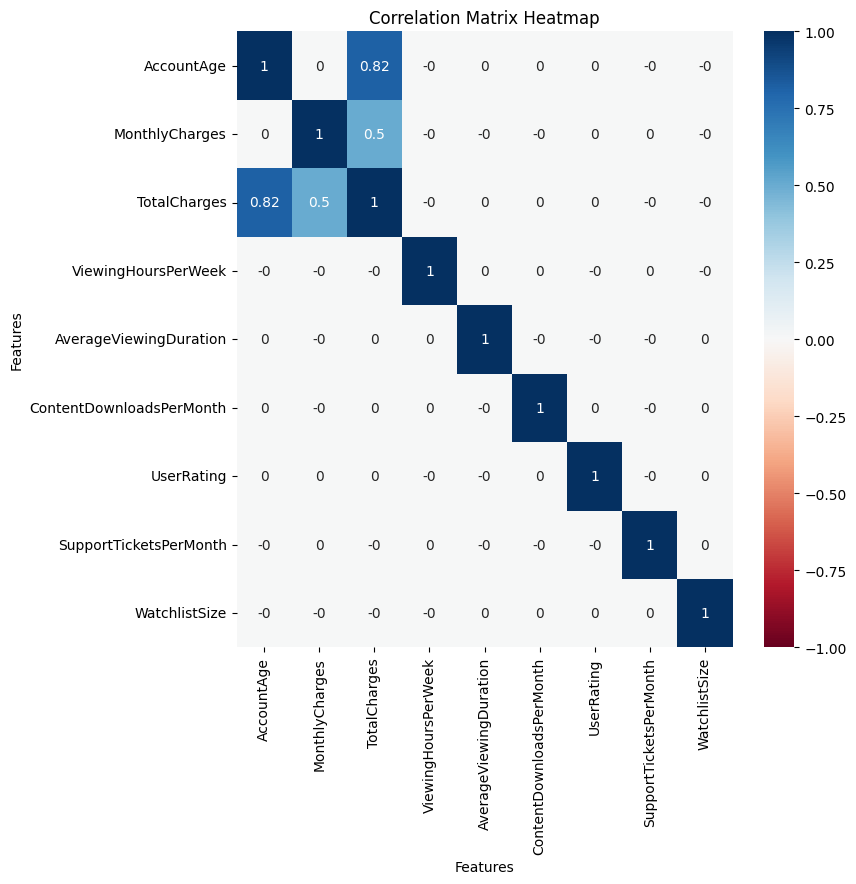

In [ ]:
'''
Use seaborn to plot the correlation matrix among numerical features.
Noticed that account age and total charges, total charges and monthly charges are highly correlated
espeically account age and total charges. This is reseonbale because account age * monthly charge = total charge
so we will remove total charges
'''
corr_mat = train[numeric_columns].corr()
plt.figure(figsize=(8, 8))
sns.heatmap(round(corr_mat,2), annot=True, cmap='RdBu', center=0, vmin=-1, vmax=1)
plt.xlabel("Features")
plt.ylabel("Features")
plt.title("Correlation Matrix Heatmap")
plt.show()


### Analysis
- We use seaborn to plot the correlation matrix among numerical features.
Noticed that account age and total charges, total charges and monthly charges are highly correlated, espeically account age and total charges. This is reseonbale because account age * monthly charge = total charge
so we will remove total charges

**Encoding**

In [ ]:
encoded_columns = pd.get_dummies(train[['PaymentMethod','ContentType','GenrePreference','Gender','ParentalControl','SubtitlesEnabled']])
encoded_columns['ID'] = train.CustomerID
encoded_columns

,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check,ContentType_Both,ContentType_Movies,ContentType_TV Shows,GenrePreference_Action,GenrePreference_Comedy,GenrePreference_Drama,GenrePreference_Fantasy,GenrePreference_Sci-Fi,Gender_Female,Gender_Male,ParentalControl_No,ParentalControl_Yes,SubtitlesEnabled_No,SubtitlesEnabled_Yes,ID
0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,1,0,1,0,CB6SXPNVZA
1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1,S7R2G87O09
2,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,1,EASDC20BDT
3,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,NPF69NT69N
4,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,4LGYPK7VOL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243782,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,1,0,FBZ38J108Z
243783,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,1,0,W4AO1Y6NAI
243784,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,1,0H3SWWI7IU
243785,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,63SJ44RT4A


In [ ]:
pysqldf = lambda q: ps.sqldf(q, globals())
qry = """
SELECT
    AccountAge,
    MonthlyCharges,
    CASE
        WHEN SubscriptionType ='Basic' THEN 0
        WHEN SubscriptionType ='Standard' THEN 1
        ELSE 2
    END AS SubscriptionType,
    ViewingHoursPerWeek,
    AverageViewingDuration,
    ContentDownloadsPerMonth,
    UserRating,
    SupportTicketsPerMonth,
    WatchlistSize,
    Churn,
    CASE
        WHEN AccountAgeSeg ='0-10' THEN 0
        WHEN AccountAgeSeg ='10-20' THEN 1
        WHEN AccountAgeSeg ='20-30' THEN 2
        WHEN AccountAgeSeg ='30-40' THEN 3
        WHEN AccountAgeSeg ='40-50' THEN 4
        WHEN AccountAgeSeg ='50-60' THEN 5
        WHEN AccountAgeSeg ='60-70' THEN 6
        WHEN AccountAgeSeg ='70-80' THEN 7
        WHEN AccountAgeSeg ='80-90' THEN 8
        WHEN AccountAgeSeg ='90-100' THEN 9
        WHEN AccountAgeSeg ='100-110' THEN 10
        ELSE 11
    END AS AccountAgeSeg,
    CASE
        WHEN MonthChargeSeg ='0-10' THEN 0 ELSE 1
    END AS MonthChargeSeg,
    CustomerID

FROM train

"""

sub = pysqldf(qry)
sub




,AccountAge,MonthlyCharges,SubscriptionType,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,Churn,AccountAgeSeg,MonthChargeSeg,CustomerID
0,20,11.055215,2,36.758104,63.531377,10,2.176498,4,3,0,2,1,CB6SXPNVZA
1,57,5.175208,0,32.450568,25.725595,18,3.478632,8,23,0,5,0,S7R2G87O09
2,73,12.106657,0,7.395160,57.364061,23,4.238824,6,1,0,7,1,EASDC20BDT
3,32,7.263743,0,27.960389,131.537507,30,4.276013,2,24,0,3,0,NPF69NT69N
4,57,16.953078,2,20.083397,45.356653,20,3.616170,4,0,0,5,1,4LGYPK7VOL
...,...,...,...,...,...,...,...,...,...,...,...,...,...
243782,77,9.639902,0,13.502729,80.367312,47,3.697451,1,8,0,7,0,FBZ38J108Z
243783,117,13.049257,2,24.963291,59.818441,35,1.449742,4,20,0,11,1,W4AO1Y6NAI
243784,113,14.514569,2,10.628728,176.186095,44,4.012217,6,13,0,11,1,0H3SWWI7IU
243785,7,18.140555,2,30.466782,153.386315,36,2.135789,7,5,0,0,1,63SJ44RT4A


In [ ]:
qry = """
SELECT *
FROM sub a
INNER JOIN encoded_columns b
on a.CustomerID = b.ID;
"""
joined = pysqldf(qry)
joined

,AccountAge,MonthlyCharges,SubscriptionType,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,Churn,...,GenrePreference_Drama,GenrePreference_Fantasy,GenrePreference_Sci-Fi,Gender_Female,Gender_Male,ParentalControl_No,ParentalControl_Yes,SubtitlesEnabled_No,SubtitlesEnabled_Yes,ID
0,20,11.055215,2,36.758104,63.531377,10,2.176498,4,3,0,...,0,0,1,0,1,1,0,1,0,CB6SXPNVZA
1,57,5.175208,0,32.450568,25.725595,18,3.478632,8,23,0,...,0,0,0,0,1,1,0,0,1,S7R2G87O09
2,73,12.106657,0,7.395160,57.364061,23,4.238824,6,1,0,...,0,1,0,0,1,0,1,0,1,EASDC20BDT
3,32,7.263743,0,27.960389,131.537507,30,4.276013,2,24,0,...,1,0,0,0,1,0,1,0,1,NPF69NT69N
4,57,16.953078,2,20.083397,45.356653,20,3.616170,4,0,0,...,0,0,0,1,0,1,0,1,0,4LGYPK7VOL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243782,77,9.639902,0,13.502729,80.367312,47,3.697451,1,8,0,...,0,0,1,0,1,0,1,1,0,FBZ38J108Z
243783,117,13.049257,2,24.963291,59.818441,35,1.449742,4,20,0,...,0,0,0,0,1,1,0,1,0,W4AO1Y6NAI
243784,113,14.514569,2,10.628728,176.186095,44,4.012217,6,13,0,...,0,0,0,0,1,0,1,0,1,0H3SWWI7IU
243785,7,18.140555,2,30.466782,153.386315,36,2.135789,7,5,0,...,0,1,0,1,0,1,0,0,1,63SJ44RT4A


### Analysis
- Encoded categorical features (PaymentMethod, ContentType, GenrePreference, Gender, ParentalControl, SubtitlesEnabled).
- Transformed numerical features (SubscriptionType, AccountAgeSeg, MonthChargeSeg).
- Other selected features from the original dataset.

**Outliers Detection**

In [ ]:
def find_outliers_IQR(col):
  '''
  Parameters
  ----------
  col: numpy.array 1 dimension
       the column that need to be detected
  Returns
  -------
  The numpy.array
      outliers in the input column
  '''

  Q1=col.quantile(0.25)
  Q3=col.quantile(0.75)
  IQR=Q3-Q1
  outliers = col[((col<(Q1-1.5*IQR)) | (col>(Q3+1.5*IQR)))]
  return(outliers)

def outlier_prop(outliers, col):
  '''
  Parameters
  ----------
  outliers: numpy.array 1 dimension
            outliers in the column
  col: numpy.array 1 dimension
        the column that need to be detected
  Returns
  -------
  string
  outlier proportion in the column
  '''
  outlier_size = len(outliers)
  return str(round(100*outlier_size / (len(col) + outlier_size),3))+'%'

continuous = ['AccountAge','MonthlyCharges','ViewingHoursPerWeek','AverageViewingDuration','ContentDownloadsPerMonth',\
              'UserRating','SupportTicketsPerMonth','WatchlistSize']

print(joined[continuous].apply(lambda x:  outlier_prop(find_outliers_IQR(x), x)))



AccountAge                  0.0%
MonthlyCharges              0.0%
ViewingHoursPerWeek         0.0%
AverageViewingDuration      0.0%
ContentDownloadsPerMonth    0.0%
UserRating                  0.0%
SupportTicketsPerMonth      0.0%
WatchlistSize               0.0%
dtype: object


**Train Test Split**

In [ ]:
X = joined.drop(['Churn','CustomerID','ID'],axis=1)
y = joined['Churn']


**Standard Scale**

In [ ]:
ss=StandardScaler()
ss.fit(X[continuous])
X[continuous] = ss.transform(X[continuous])
X


,AccountAge,MonthlyCharges,SubscriptionType,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,AccountAgeSeg,...,GenrePreference_Comedy,GenrePreference_Drama,GenrePreference_Fantasy,GenrePreference_Sci-Fi,Gender_Female,Gender_Male,ParentalControl_No,ParentalControl_Yes,SubtitlesEnabled_No,SubtitlesEnabled_Yes
0,-1.169131,-0.331703,2,1.445777,-0.568906,-1.005712,-0.715179,-0.175519,-1.253786,2,...,0,0,0,1,0,1,1,0,1,0
1,-0.089945,-1.690423,0,1.062671,-1.317459,-0.450971,0.411960,1.216976,1.526687,5,...,0,0,0,0,0,1,1,0,0,1
2,0.376731,-0.088741,0,-1.165718,-0.691019,-0.104258,1.069988,0.520728,-1.531833,7,...,0,0,1,0,0,1,0,1,0,1
3,-0.819125,-1.207816,0,0.663322,0.777613,0.381141,1.102179,-0.871766,1.665711,3,...,0,1,0,0,0,1,0,1,0,1
4,-0.089945,1.031143,2,-0.037246,-0.928765,-0.312285,0.531014,-0.175519,-1.670857,5,...,1,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243782,0.493400,-0.658746,0,-0.622520,-0.235555,1.559965,0.601371,-1.219890,-0.558668,7,...,0,0,0,1,0,1,0,1,1,0
243783,1.660088,0.129070,2,0.396764,-0.642422,0.727854,-1.344265,-0.175519,1.109616,11,...,1,0,0,0,0,1,1,0,1,0
243784,1.543419,0.467666,2,-0.878129,1.661653,1.351938,0.873836,0.520728,0.136451,11,...,0,0,0,0,0,1,0,1,0,1
243785,-1.548305,1.305539,2,0.886236,1.210218,0.797197,-0.750417,0.868852,-0.975739,0,...,0,0,1,0,1,0,1,0,0,1


In [ ]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train,y_val = train_test_split(X_temp, y_temp, test_size=0.1, random_state=42)
print(f'X_train: {X_train.shape}')
print(f'y_train: {y_train.shape}')

print(f'X_val: {X_val.shape}')
print(f'y_val: {y_val.shape}')

print(f'X_test: {X_test.shape}')
print(f'y_test: {y_test.shape}')

X_train: (197467, 29)
y_train: (197467,)
X_val: (21941, 29)
y_val: (21941,)
X_test: (24379, 29)
y_test: (24379,)


### Analysis
- Training Set:

  Features (X_train): 197,467 samples, 29 features.

  Target (y_train): 197,467 samples.
- Validation Set:

  Features (X_val): 21,941 samples, 29 features.

  Target (y_val): 21,941 samples.
- Test Set:

  Features (X_test): 24,379 samples, 29 features.
  
  Target (y_test): 24,379 samples.


# Model


## Logistic Regression

In [ ]:
regs = [0.01,0.1,0.3,0.5,0.7,1,10,100]
f1_val = {}
recall_val = {}
acc_val={}
f1_train = {}
recall_train = {}
acc_train={}
for reg in regs:

  model = LogisticRegression(C=reg,penalty='l2',solver='lbfgs')
  model.fit(X_train,y_train)

  reg=str(reg)
  y_pred = model.predict(X_val)
  f1_val[reg] = f1_score(y_val,y_pred)
  recall_val[reg] = recall_score(y_val,y_pred)
  acc_val[reg] = accuracy_score(y_val,y_pred)

  y_pred_train = model.predict(X_train)
  f1_train[reg] = f1_score(y_train,y_pred_train)
  recall_train[reg] = recall_score(y_train,y_pred_train)
  acc_train[reg] = accuracy_score(y_train,y_pred_train)



In [ ]:
y_pred = model.predict(X_test)
print(f'Logistic Regression Accuracy on Test Data: {accuracy_score(y_test,y_pred)}')
print(f'Logistic Regression Recall on Test Data: {recall_score(y_test,y_pred)}')
print(f'Logistic Regression F1 on Test Data: {f1_score(y_test,y_pred)}')

Logistic Regression Accuracy on Test Data: 0.8243570285901801
Logistic Regression Recall on Test Data: 0.12039144287664998
Logistic Regression F1 on Test Data: 0.19812734082397004


The best regularization strength (C value) based on the F1 score and recall on the validation set is `0.3`.

When the model with `C=0.3` was evaluated on the test set, the performance metrics were as follows:

- **Accuracy**: Approximately 82.42%
- **Recall**: Approximately 11.99%
- **F1 Score**: Approximately 19.74%

These results indicate that while the model is fairly accurate in terms of overall predictions, its ability to correctly identify positive cases (churn) is relatively low, as seen in the recall and F1 score. This could be due to class imbalance or other factors in the dataset.

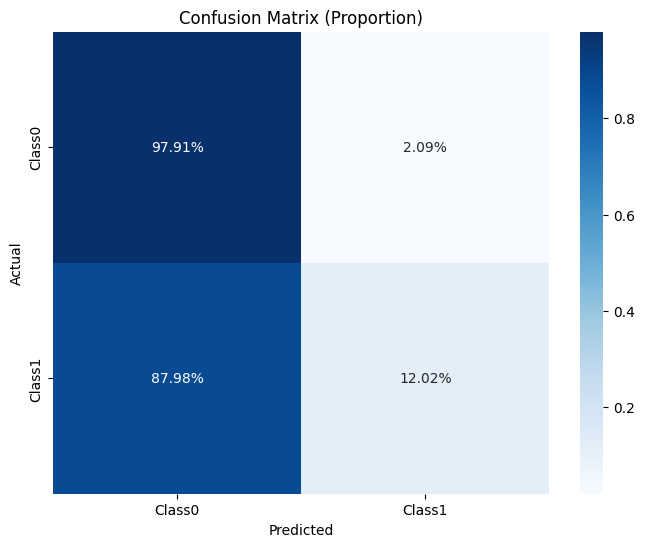

In [ ]:
cm = confusion_matrix(y_test, y_pred,normalize='true')
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt=".2%", cmap="Blues", xticklabels=['Not Churn','Churn'], yticklabels=['Not Churn','Churn'])
plt.title('Confusion Matrix Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The confusion matrix for the Logistic Regression model (with `C=0.3`) on the test set is displayed above. This matrix provides a percentage breakdown of the model's predictions in terms of true positives, true negatives, false positives, and false negatives:

- **True Positives (Bottom Right):** Correctly predicted churn cases.
- **True Negatives (Top Left):** Correctly predicted non-churn cases.
- **False Positives (Top Right):** Non-churn cases incorrectly predicted as churn.
- **False Negatives (Bottom Left):** Churn cases incorrectly predicted as non-churn.

The percentages in each cell indicate the proportion of the total test set that falls into each category. This visualization can help in understanding the model's strengths and weaknesses in predicting churn and can guide further improvements or adjustments to the model.

### Logistic Regression Model Analysis

#### Model Performance Metrics:
- **Accuracy**: The model achieved an accuracy of approximately 82.42%. This indicates that the model correctly predicts whether a customer will churn or not in a significant majority of cases.
- **Recall**: With a recall of about 11.99%, the model isn't very effective at identifying actual churn cases, missing out on many customers who are likely to churn.
- **F1 Score**: An F1 score of around 19.74% suggests a balance between precision and recall, leaning towards a lower recall.

#### Confusion Matrix Analysis:
- The confusion matrix shows that while the model is good at predicting the 'Not Churn' class (True Negatives), it struggles with correctly identifying the 'Churn' class (True Positives).
- The high number of False Negatives suggests that many customers who actually churn are predicted as 'Not Churn' by the model.

#### Implications:
- **Class Imbalance**: If there's a significant class imbalance in the dataset, it could lead to a model biased towards predicting the majority class, potentially explaining the low recall.

- **Alternative Models**: Given the low recall, we will try Random Forest and FNN models next.



## Random Forest


In [ ]:
rf = RandomForestClassifier(verbose=False,random_state = 42)

param_dist = {
    'n_estimators': randint(10, 100),
    'max_depth': randint(1, 20),
}

random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=100, cv=5, scoring='roc_auc', random_state=42)

random_search.fit(X_train, y_train)

best_params_rf = random_search.best_params_

In [ ]:
print(best_params_rf)

{'max_depth': 11, 'n_estimators': 98}


In [ ]:
rf = RandomForestClassifier(max_depth=11, n_estimators=98,random_state = 42)
rf.fit(X_train, y_train)
y_pred_rf=rf.predict(X_test)


In [ ]:
print(f'Random Forest Accuracy on Test Data: {accuracy_score(y_test,y_pred_rf)}')
print(f'Random Forest Recall on Test Data: {recall_score(y_test,y_pred_rf)}')
print(f'Random Forest F1 on Test Data: {f1_score(y_test,y_pred_rf)}')

Random Forest Accuracy on Test Data: 0.8213626481808114
Random Forest Recall on Test Data: 0.03322712790168411
Random Forest F1 on Test Data: 0.06283623843339788


#### Performance on Test Data

- **Accuracy (Approximately 82.14%)**:
  - The model is quite accurate overall in predicting whether a customer will churn or not. This high accuracy indicates that the model performs well in classifying the majority class (likely the 'Not Churn' class in this case).

- **Recall (Approximately 3.32%)**:
  - The recall is quite low. This means that the model is not very effective at correctly identifying the actual churn cases. In practical terms, it's missing a large number of customers who are actually likely to churn.

- **F1 Score (Approximately 6.28%)**:
  - The F1 score, which balances precision and recall, is also low. This further suggests that while the model is good at predicting the majority class, it struggles with the minority class (churn cases), resulting in a low precision-recall balance.


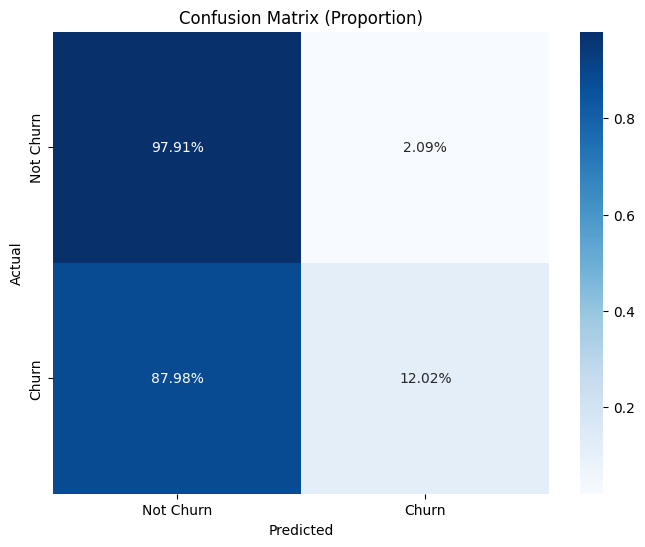

In [ ]:
cm = confusion_matrix(y_test, y_pred,normalize='true')
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt=".2%", cmap="Blues", xticklabels=['Not Churn','Churn'], yticklabels=['Not Churn','Churn'])
plt.title('Confusion Matrix Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Analysis of Random Forest Model Confusion Matrix

- **True Negative Rate (Top Left, "Not Churn" - Actual vs. "Not Churn" - Predicted)**: The model has a high true negative rate, with approximately 97.91% of the non-churning customers correctly classified. This suggests that the model is very effective at identifying customers who will not churn.

- **False Positive Rate (Top Right, "Not Churn" - Actual vs. "Churn" - Predicted)**: A low false positive rate of about 2.09% indicates that the model rarely misclassifies non-churning customers as churners.

- **False Negative Rate (Bottom Left, "Churn" - Actual vs. "Not Churn" - Predicted)**: The false negative rate is quite high at approximately 87.98%, indicating that the model misses a significant number of actual churn cases. This is a crucial area for improvement, as it directly impacts the business objective of customer retention.

- **True Positive Rate (Bottom Right, "Churn" - Actual vs. "Churn" - Predicted)**: The model correctly identified about 12.02% of the churn cases. While the true positive rate is relatively low, it shows that there are certain patterns the model can recognize.



## FNN

In [ ]:
'''
Model Architecture
'''
class FNN(nn.Module):
    def __init__(self,input_size=29):
        super().__init__()
        self.fc1 = nn.Linear(input_size, 512)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(512,256)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(256, 2)

    def forward(self, x):
        x = self.fc3(self.relu2(self.fc2(self.relu1(self.fc1(x)))))
        return x

In [ ]:
def train_model(model, train_loader, val_loader, optimizer, num_epochs = 20):
  train_loss, validation_loss = [], []
  train_acc, validation_acc = [], []

  for epoch in range(num_epochs):
    model.train()
    running_loss = 0.
    correct, total = 0, 0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        predictions = model(inputs)
        optimizer.zero_grad()
        loss = criterion(predictions, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(predictions, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    train_loss.append(running_loss / len(train_loader))
    train_acc.append(correct/total)

    model.eval()
    running_loss = 0.
    correct, total = 0, 0
    for i, data in enumerate(val_loader, 0):
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        predictions = model(inputs)
        loss = criterion(predictions, labels)
        running_loss += loss.item()
        _, predicted = torch.max(predictions, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    validation_loss.append(running_loss / len(val_loader))
    validation_acc.append(correct/total)
    print(f"Epoch {epoch+1}:")
    print(f"Training Loss:", round(train_loss[epoch], 3)," Validation Loss:", round(validation_loss[epoch], 3)," Training Accuracy:", round(train_acc[epoch], 3), " Validation Accuracy:", round(validation_acc[epoch], 3) )
    print("------------------------------")
  return train_loss, validation_loss, train_acc, validation_acc

In [ ]:
'''
Load Dataset using DataLoader
'''
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=True)

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

In [ ]:
'''
Create our FNN model and print the model summary
'''
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_size = X_train.shape[1]
fnn = FNN(input_size=input_size)
summary(fnn,(29,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 512]          15,360
              ReLU-2                  [-1, 512]               0
            Linear-3                  [-1, 256]         131,328
              ReLU-4                  [-1, 256]               0
            Linear-5                    [-1, 2]             514
Total params: 147,202
Trainable params: 147,202
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.56
Estimated Total Size (MB): 0.57
----------------------------------------------------------------


In [ ]:
'''
Training
'''
criterion = nn.CrossEntropyLoss()
learning_rate = 1e-4
optimizer = torch.optim.SGD(fnn.parameters(), lr = learning_rate, momentum = 0.2)
num_epochs=15
train_loss_1, validation_loss_1, train_acc_1, validation_acc_1 = train_model(fnn, train_loader, val_loader, optimizer, num_epochs = num_epochs)

Epoch 1:
Training Loss: 0.454  Validation Loss: 0.439  Training Accuracy: 0.819  Validation Accuracy: 0.82
------------------------------
Epoch 2:
Training Loss: 0.435  Validation Loss: 0.427  Training Accuracy: 0.819  Validation Accuracy: 0.82
------------------------------
Epoch 3:
Training Loss: 0.425  Validation Loss: 0.419  Training Accuracy: 0.819  Validation Accuracy: 0.82
------------------------------
Epoch 4:
Training Loss: 0.419  Validation Loss: 0.415  Training Accuracy: 0.819  Validation Accuracy: 0.821
------------------------------
Epoch 5:
Training Loss: 0.416  Validation Loss: 0.413  Training Accuracy: 0.82  Validation Accuracy: 0.822
------------------------------
Epoch 6:
Training Loss: 0.414  Validation Loss: 0.413  Training Accuracy: 0.822  Validation Accuracy: 0.823
------------------------------
Epoch 7:
Training Loss: 0.414  Validation Loss: 0.412  Training Accuracy: 0.823  Validation Accuracy: 0.823
------------------------------
Epoch 8:
Training Loss: 0.413  

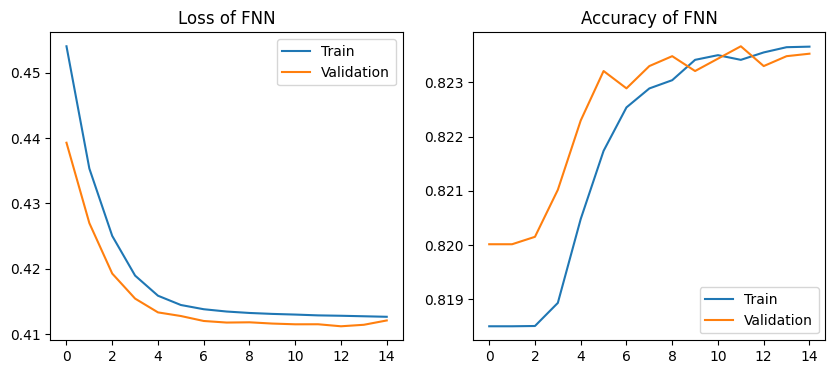

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

axes[0].plot(range(num_epochs),train_loss_1,label='Train')
axes[0].plot(range(num_epochs),validation_loss_1,label='Validation')
axes[0].legend()
axes[0].set_title('Loss of FNN')

axes[1].plot(range(num_epochs),train_acc_1,label='Train')
axes[1].plot(range(num_epochs),validation_acc_1,label='Validation')
axes[1].legend()
axes[1].set_title('Accuracy of FNN')
plt.show()

1. **Loss and Accuracy Graphs**:

    - **Loss Graph**:
      - The training and validation loss both decrease sharply at the beginning, which indicates that the model is learning from the data.
      - As epochs increase, both lines flatten out, showing that the model has reached a point where additional training does not significantly reduce the loss - a sign of convergence.
      - At the end, we can see validation loss starts to increase which suggests that we may use too many epochs so that the model begins to overfit training data

    - **Accuracy Graph**:
      - The accuracy for both training and validation increases rapidly at first and then plateaus, similar to the loss graph.
      - The validation accuracy closely follows the training accuracy and even slightly exceeds it at certain points. This could be due to the model's generalization but also could be a result of the validation set characteristics or the model's capacity.
      - The plateau in accuracy suggests that the model might not benefit from further training epochs without adjustments to the model or training procedure.

In [ ]:
all_predictions = []
all_labels = []
with torch.no_grad():
  for i, data in enumerate(test_loader, 0):
          inputs, labels = data
          predictions = fnn(inputs)
          _, predicted = torch.max(predictions, 1)
          all_predictions.extend(predicted.numpy())
          all_labels.extend(labels.numpy())

recall_per_class = recall_score(all_labels, all_predictions, average=None)
print(f'FNN Accuracy on Test Data: {accuracy_score(all_labels, all_predictions)}')
print(f'FNN Recall on Test Data: {recall_score(all_labels, all_predictions)}')
print(f'FNN F1 on Test Data: {f1_score(all_labels, all_predictions)}')

FNN Accuracy on Test Data: 0.8241929529513106
FNN Recall on Test Data: 0.10559854346836596
FNN F1 on Test Data: 0.1779823551975451


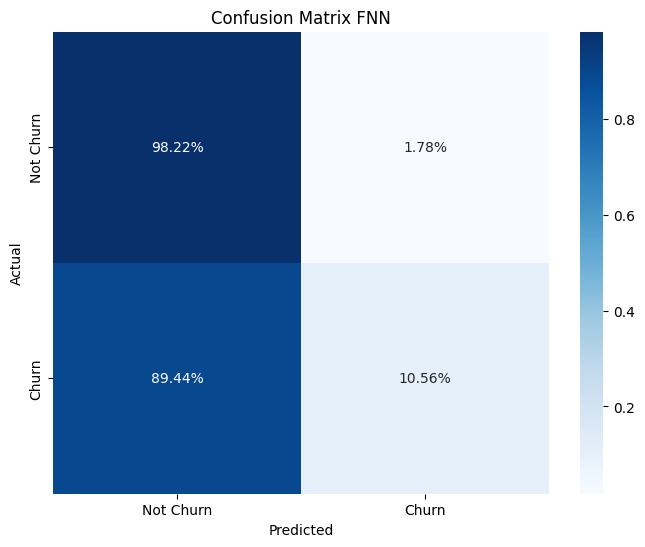

In [ ]:
cm = confusion_matrix(all_labels, all_predictions,normalize='true')
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt=".2%", cmap="Blues", xticklabels=['Not Churn','Churn'], yticklabels=['Not Churn','Churn'])
plt.title('Confusion Matrix FNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

2. **Confusion Matrix**:
    - For the 'Not Churn' class, the model has a high true positive rate of 98.22%, indicating that it is very effective at identifying customers who do not churn.
    - For the 'Churn' class, the true positive rate is much lower at 10.56%, suggesting that the model struggles to correctly identify customers who will churn. This is also reflected in the high false negative rate for the churn class (89.44%), meaning that many customers who will churn are being misclassified as 'Not Churn'.
    - This imbalance in performance between classes could be due to an imbalanced dataset, where the number of 'Not Churn' instances far exceeds 'Churn' instances, causing the model to be biased towards predicting the majority class.


### FNN Analysis

1. **Training and Validation Curves:**
   - The loss curves indicate that the model has converged, as the training and validation loss have stabilized over epochs.
   - The accuracy curves also suggest that the model has reached a plateau, showing that further training might not lead to significant improvements in performance.

2. **Model Evaluation:**
   - The FNN model achieves an accuracy of approximately 82.42% on the test data.
   - However, the recall (10.56%) and F1 score (17.80%) for the positive class ('Churn') are quite low, indicating that the model might not be capturing the churned customers effectively.

3. **Confusion Matrix:**
   - The confusion matrix reveals that the model is performing well in predicting the 'Not Churn' class but not as well for the 'Churn' class. This is consistent with the low recall and F1 scores for the positive class.

# Resample

 - Previous results indicate that we need to address the issue of imbalanced sample or it will not be possible to generate a good result using any model.
Hence, we are going to use 2 resample methods: downsample the majority class and upsample the minority class.
For downsampling, we will randomly choose a subset a majority class.
For upsampling, we will use SMOTE to create more datas in minoriy class

In [ ]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
rus = RandomUnderSampler(sampling_strategy={0: 80000}, random_state=42)#downsample class 0 to 80000 instances
X_resample, y_resample = rus.fit_resample(X_temp, y_temp)
smt = SMOTE(sampling_strategy={1: 80000})#up sample class 1 to 80000 instances
X_resample, y_resample = smt.fit_resample(X_resample, y_resample)

X_train, X_val, y_train,y_val = train_test_split(X_resample, y_resample, test_size=0.1, random_state=42)


In [ ]:
'''
Test the performance of logistic regression on resampled data.
'''
model = LogisticRegression(C=0.03,penalty='l2',solver='lbfgs')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(f'Logistic Regression Accuracy on Test Data: {accuracy_score(y_test,y_pred)}')
print(f'Logistic Regression Recall on Test Data: {recall_score(y_test,y_pred)}')
print(f'Logistic Regression F1 on Test Data: {f1_score(y_test,y_pred)}')

Logistic Regression Accuracy on Test Data: 0.7671356495344354
Logistic Regression Recall on Test Data: 0.5116067364588075
Logistic Regression F1 on Test Data: 0.44195419247026446


In [ ]:
'''
Test the performance of random forest on resampled data.
'''
rf = RandomForestClassifier(max_depth=11, n_estimators=98,random_state = 42)
rf.fit(X_train, y_train)
y_pred_rf=rf.predict(X_test)
print(f'Random Forest Accuracy on Test Data: {accuracy_score(y_test,y_pred_rf)}')
print(f'Random Forest Recall on Test Data: {recall_score(y_test,y_pred_rf)}')
print(f'Random Forest F1 on Test Data: {f1_score(y_test,y_pred_rf)}')

Random Forest Accuracy on Test Data: 0.6950244062512818
Random Forest Recall on Test Data: 0.6513427401001366
Random Forest F1 on Test Data: 0.4349874610532716


In [ ]:
'''
Process resampled data so that they can be fitted into FNN
'''
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=True)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

In [ ]:
'''
Test the performance of FNN on resampled data.
'''
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_size = X_train.shape[1]
fnn = FNN(input_size=input_size)
criterion = nn.CrossEntropyLoss()
learning_rate = 1e-4
optimizer = torch.optim.SGD(fnn.parameters(), lr = learning_rate, momentum = 0.2)
num_epochs=200
train_loss_1, validation_loss_1, train_acc_1, validation_acc_1 = train_model(fnn, train_loader, val_loader, optimizer, num_epochs = num_epochs)

Epoch 1:
Training Loss: 0.659  Validation Loss: 0.635  Training Accuracy: 0.607  Validation Accuracy: 0.659
------------------------------
Epoch 2:
Training Loss: 0.618  Validation Loss: 0.61  Training Accuracy: 0.669  Validation Accuracy: 0.672
------------------------------
Epoch 3:
Training Loss: 0.6  Validation Loss: 0.597  Training Accuracy: 0.68  Validation Accuracy: 0.682
------------------------------
Epoch 4:
Training Loss: 0.591  Validation Loss: 0.591  Training Accuracy: 0.687  Validation Accuracy: 0.687
------------------------------
Epoch 5:
Training Loss: 0.586  Validation Loss: 0.587  Training Accuracy: 0.69  Validation Accuracy: 0.686
------------------------------
Epoch 6:
Training Loss: 0.583  Validation Loss: 0.584  Training Accuracy: 0.693  Validation Accuracy: 0.689
------------------------------
Epoch 7:
Training Loss: 0.581  Validation Loss: 0.582  Training Accuracy: 0.694  Validation Accuracy: 0.69
------------------------------
Epoch 8:
Training Loss: 0.579  Va

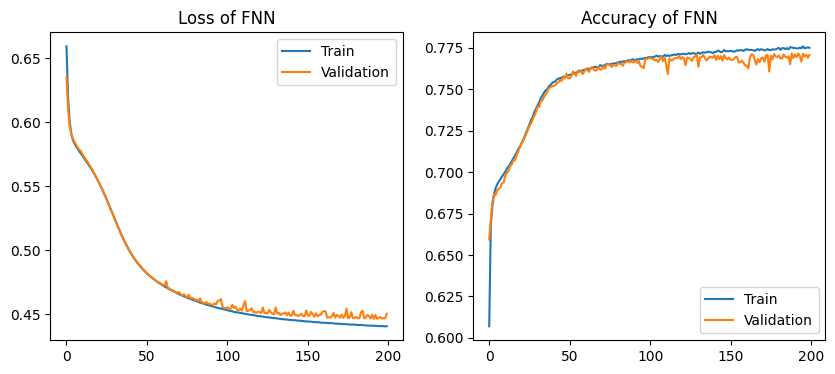

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
axes[0].plot(range(num_epochs),train_loss_1,label='Train')
axes[0].plot(range(num_epochs),validation_loss_1,label='Validation')
axes[0].legend()
axes[0].set_title('Loss of FNN')
axes[1].plot(range(num_epochs),train_acc_1,label='Train')
axes[1].plot(range(num_epochs),validation_acc_1,label='Validation')
axes[1].legend()
axes[1].set_title('Accuracy of FNN')
plt.show()

In [ ]:
all_predictions = []
all_labels = []
all_proba=[]
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = fnn(inputs)
        _, predicted = torch.max(outputs, 1)
        all_proba.extend(outputs.numpy())

        all_predictions.extend(predicted.numpy())
        all_labels.extend(labels.numpy())

recall_per_class = recall_score(all_labels, all_predictions, average=None)
acc=accuracy_score(all_labels, all_predictions)
recall = recall_score(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions)


In [ ]:
print(f'FNN Accuracy on Test Data: 0.7867426883793429')
print(f'FNN Recall on Test Data: 0.41238051888939464')
print(f'FNN F1 on Test Data: 0.41074464467868077')

FNN Accuracy on Test Data: 0.7867426883793429
FNN Recall on Test Data: 0.41238051888939464
FNN F1 on Test Data: 0.41074464467868077



**Discussion**

- After resampled data and train models on the new data, we can observe a great increase in performance for all models, especially for recall and F1 though accuracy decreases a little, which is acceptable (We aim to find as many churn customers as possible)
- Based on the trend of plots, we can observe an elbow point in around epoch 50 and after that the validation loss decrease in a very low speed and the validation accuracy does not change a lot as well. So Epoch 50 would be a good stop point

In [ ]:
def ROC_AUC_plot(y_test, pred):
  '''
  Parameters
  ----------
  y_test: numpy.array (N,2)
          The test label
  pred: numpy.array (N,2)
        The prediciton label
  Returns
  -------
  Draw a ROC_AUC plot based on y_test and pred
  '''
  n_classes=2
  fpr = {}
  tpr = {}
  roc_auc = {}
  for i in range(n_classes):
      fpr[i], tpr[i], threshold = roc_curve(y_test_binarized[:, i], pred[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])

  plt.figure(figsize=(8, 6))
  colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])

  for i, color in zip(range(n_classes), colors):
      plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

  plt.plot([0, 1], [0, 1], 'k--', lw=2)
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve')
  plt.legend(loc="lower right")
  plt.show()
  optimal_idx = np.argmax(tpr[1] - fpr[1])
  print(f'Optimal Index could be {threshold[optimal_idx]}')


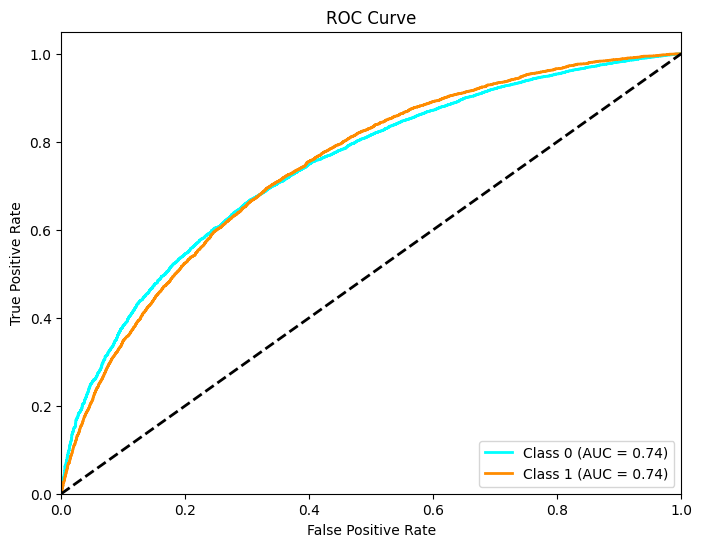

Optimal Index could be 0.47801056450194607


In [ ]:
y_pred_rf_prob=rf.predict_proba(X_test)
y_test_binarized = label_binarize(y_test, classes=[0,1,2])
ROC_AUC_plot(y_test_binarized,y_pred_rf_prob)

In [ ]:
predictions_custom_threshold = (y_pred_rf_prob[:, 1] >= 0.45).astype(int)
print(f'Random Forest Accuracy on Test Data: {accuracy_score(y_test,predictions_custom_threshold)}')
print(f'Random Forest Recall on Test Data: {recall_score(y_test,predictions_custom_threshold)}')
print(f'Random Forest ROC AUC on Test Data: {roc_auc_score(y_test,predictions_custom_threshold)}')
print(f'Random Forest Precition on Test Data: {precision_score(y_test,predictions_custom_threshold)}')


Random Forest Accuracy on Test Data: 0.6365724599040158
Random Forest Recall on Test Data: 0.7401001365498406
Random Forest ROC AUC on Test Data: 0.6769552471590835
Random Forest Precition on Test Data: 0.29644484958979034


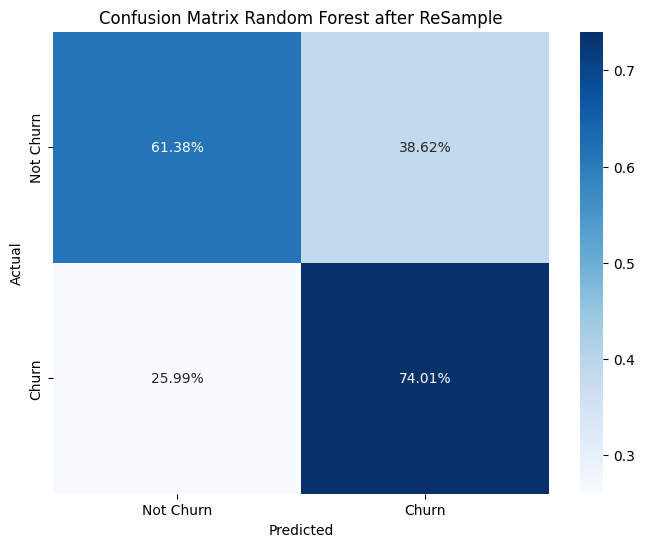

In [ ]:
cm = confusion_matrix(y_test, predictions_custom_threshold,normalize='true')
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt=".2%", cmap="Blues", xticklabels=['Not Churn','Churn'], yticklabels=['Not Churn','Churn'])
plt.title('Confusion Matrix Random Forest after ReSample')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Discussion**

We choose random forest as our final model since it has a better overal performance among 3 different models
We step further on random forest.
First, we draw a ROC-AUC curve to give a better insights of how FPR and TPR change given different probabilty threshold.
Normally, the threshold that maximize the difference between FPR and TPR is the optimal solution which is 0.478 in our case. However, we choose to use 0.45 as our threshold. As we emphasied before, we need to find as many churn customer as possible. It is acceptable to scarify some specificity for a higher recall.

The final result is the following:


*   Accuracy on Test Data: 0.6366
*   Recall on Test Data: 0.7401
*   ROC AUC on Test Data: 0.6770

Our random forest can find 74% of churn customers among all the potentiaal churn customer while still get a accuracy of 61% in finding a not churn customer



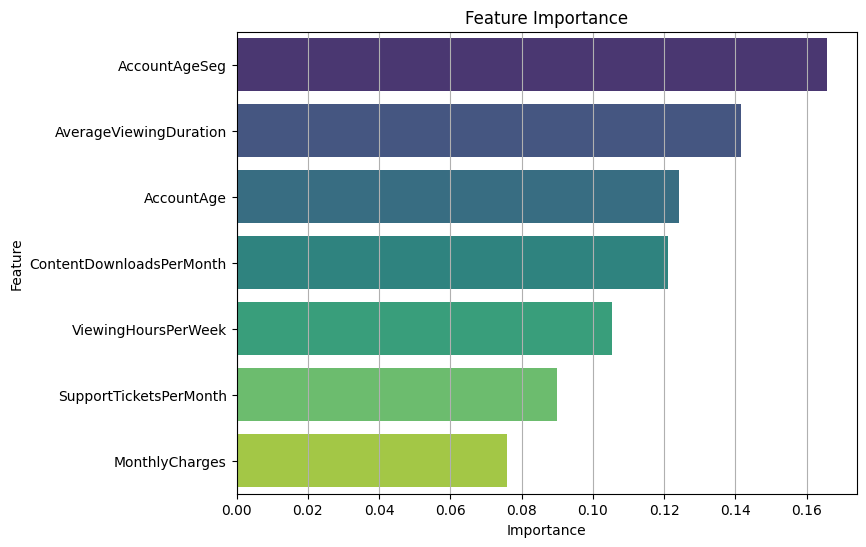

In [ ]:
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
feature_importance = feature_importance[feature_importance.Importance >= 0.05]
plt.figure(figsize=(8, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance')
plt.grid(axis = 'x')
plt.show()

In [ ]:
feature_importance[feature_importance.Importance >= 0.05]

,Feature,Importance
9,AccountAgeSeg,0.165725
4,AverageViewingDuration,0.141659
0,AccountAge,0.124106
5,ContentDownloadsPerMonth,0.121229
3,ViewingHoursPerWeek,0.105366
7,SupportTicketsPerMonth,0.089935
1,MonthlyCharges,0.075877


**Discussion**

Another potential advantage of random forest is that it is more interpretable and explainable compared with other models especially like Neural Networks which are considered as a BLACKBOX.

We can look at the decrease in Gini Index. Random forest can provide feature importance based on how much Gini Index decrease that each feature contributes to.

In our case, we can see that AccountAgeSeg, AverageViewingDuration, AccountAge, ContentDownloadsPerMonth, ViewingHoursPerWeek, SupportTicketsPerMonth and MonthlyCharges all contribute to more than 5% importance. So this inplies that we can pay more attention on these features to get a better understanding of the pattern of customer churn


# Conclusion and Further Discussion

The goal of this project is to predict customer churn for a subscription-based service using various features such as subscription type, account age, parental control, etc.

We first performed EDA on the dataset by looking at the distributions of each numerical and categorical features, discovering that all categorical features are nicely distributed. However, the distribution of the label (churn) is severely imbalanced, with the number of “churn” labels only about one fourth of the number of “no churn” labels.

For feature engineering, we first created new features by splitting the variable AccountAge and MonthlyCharge into several ranges. Then we used ANOVA test and correlation matrix to help us decide which features to use for our model. In addition, we encoded the categorical features for future use.

We first implemented a logistic regression model with L2 regularization and achieved a high accuracy of 0.8242 but a low recall of 0.1199, indicating that the model isn't very effective at identifying actual churn cases, missing out on many customers who are likely to churn. This is due to the significant class imbalance in the dataset. Therefore, the recall scores of the random forest model and feedforward neural network were not pleasant as well.

To deal with this issue, we randomly downsampled the majority class and upsampling the minority class using the SMOTE technique, resulting in a significant increase in recall score for all three models despite a small decrease in accuracy. Eventually, we selected the random forest model since it performed best among the models and it is more straightforward and interpretable. We also looked at which features contributed most to the prediction decision and discovered that “AccountAgeSeg” and “AverageViewingDuration” are the top two significant features.

For further works, we can try using Principal Component Analysis (PCA) to retain the most important features in the dataset and reduce overfitting and computational complexity by reducing the dimensionality of the input data. In particular, our FNN model seems to overfit the resampled data a bit. Using PCA may resolve this issue. We can also try adjusting the hyperparameters like number of iterations, number of filters and filter size to improve model performance. Besides, due to our imbalance dataset, it may be beneficial to try ensemble methods like bagging or stacking or particular methods like Balanced Random Forests, which are specifically designed for handling imbalanced data.

